<a href="https://colab.research.google.com/github/kartikdatascience/analytics_projects/blob/main/Uber_Rides_Data_Analysis_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing the useful librabries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#Loading our dataset into colab

df = pd.read_csv('/content/sample_data/UberDataset.csv')
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [ ]:
# knowing the shape of data i.e. number of rows and columns

df.shape

(1156, 7)

In [ ]:
# To know our dataset more deeply we need to explore about datatypes, null values, etc

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [ ]:
# As we get to know that there are so many null values in PURPOSE column, so we will fill ti with NOT keyword

df['PURPOSE'].fillna("NOT", inplace= True)
df.info()

#Now all the null values in PURPOSE columns are filled


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     1156 non-null   object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


<ipython-input-6-3e8cdb58481c>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PURPOSE'].fillna("NOT", inplace= True)


In [ ]:
# Drop rows with null values

df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1155 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1155 non-null   float64
 6   PURPOSE     1155 non-null   object 
dtypes: float64(1), object(6)
memory usage: 72.2+ KB


In [ ]:
# dropping are the duplicate rows if any

df.drop_duplicates(inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1154 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1154 non-null   object 
 1   END_DATE    1154 non-null   object 
 2   CATEGORY    1154 non-null   object 
 3   START       1154 non-null   object 
 4   STOP        1154 non-null   object 
 5   MILES       1154 non-null   float64
 6   PURPOSE     1154 non-null   object 
dtypes: float64(1), object(6)
memory usage: 72.1+ KB


In [ ]:
# Converting start_date & end_date into datetime columns

df['START_DATE'] = pd.to_datetime(df['START_DATE'],errors='coerce', infer_datetime_format=True)
df['END_DATE'] = pd.to_datetime(df['END_DATE'],errors='coerce', infer_datetime_format=True)


<ipython-input-9-a27bc9136086>:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['START_DATE'] = pd.to_datetime(df['START_DATE'],errors='coerce', infer_datetime_format=True)
<ipython-input-9-a27bc9136086>:4: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['END_DATE'] = pd.to_datetime(df['END_DATE'],errors='coerce', infer_datetime_format=True)


In [ ]:
# Data type changed to start_date, end_date
df.dtypes

,0
START_DATE,datetime64[ns]
END_DATE,datetime64[ns]
CATEGORY,object
START,object
STOP,object
MILES,float64
PURPOSE,object


In [ ]:
# Rearranging our dataset's datetime columns into format for further processing

from datetime import datetime

df['date'] = pd.DatetimeIndex(df['START_DATE']).date
df['time'] = pd.DatetimeIndex(df['START_DATE']).hour

#changing into categories of day and night
df['day-night'] = pd.cut(x=df['time'],
                              bins = [0,10,15,19,24],
                              labels = ['Morning','Afternoon','Evening','Night'])
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon
...,...,...,...,...,...,...,...,...,...,...
1150,NaT,NaT,Business,Kar?chi,Kar?chi,0.7,Meeting,NaT,NaN,NaN
1151,NaT,NaT,Business,Kar?chi,Unknown Location,3.9,Temporary Site,NaT,NaN,NaN
1152,NaT,NaT,Business,Unknown Location,Unknown Location,16.2,Meeting,NaT,NaN,NaN
1153,NaT,NaT,Business,Katunayake,Gampaha,6.4,Temporary Site,NaT,NaN,NaN


In [ ]:
df['CATEGORY'].unique()

array(['Business', 'Personal'], dtype=object)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'NOT'),
  Text(2, 0, 'Errand/Supplies'),
  Text(3, 0, 'Meeting'),
  Text(4, 0, 'Customer Visit'),
  Text(5, 0, 'Temporary Site'),
  Text(6, 0, 'Between Offices'),
  Text(7, 0, 'Charity ($)'),
  Text(8, 0, 'Commute'),
  Text(9, 0, 'Moving'),
  Text(10, 0, 'Airport/Travel')])

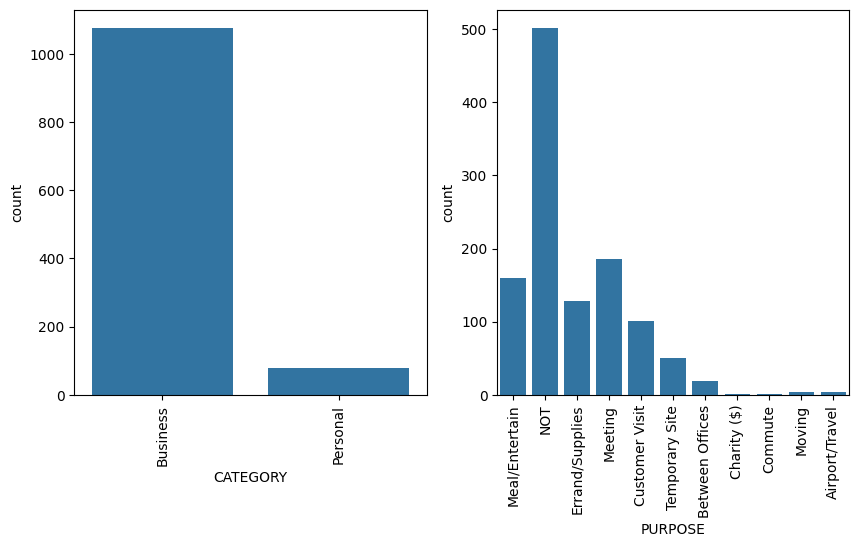

In [ ]:
# Now we will start to explore our dataset into some visualizations

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(x=df['CATEGORY'])
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(x=df['PURPOSE'])
plt.xticks(rotation=90)

([0, 1, 2, 3],
 [Text(0, 0, 'Morning'),
  Text(1, 0, 'Afternoon'),
  Text(2, 0, 'Evening'),
  Text(3, 0, 'Night')])

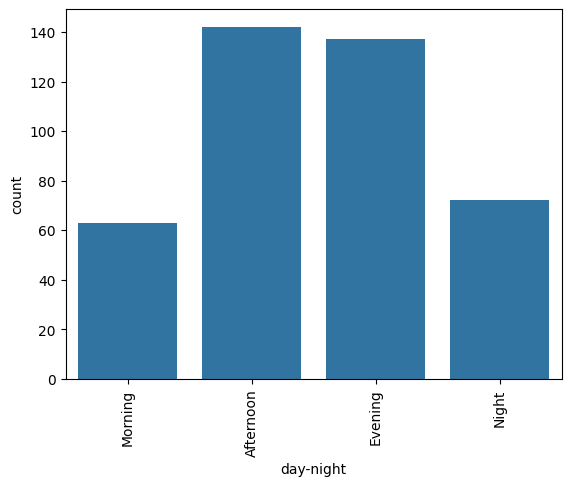

In [ ]:
sns.countplot(x=df['day-night'])
plt.xticks(rotation=90)

In [ ]:
# Grouping the CATEGORY & MILES columns to aggregate the miles with respect to the 2 categories

df[['CATEGORY','MILES']].groupby(['CATEGORY']).sum()

# Conclusion- More rides are been taken for Business purpose

,MILES
CATEGORY,
Business,11477.1
Personal,717.7


In [ ]:
# Top 10 places from where the ride starts

top_10_places = df['START'].value_counts(ascending=False)[:10]
top_10_places

,count
START,
Cary,201
Unknown Location,148
Morrisville,85
Whitebridge,68
Islamabad,57
Lahore,36
Durham,36
Raleigh,28
Kar?chi,27


<Axes: title={'center': 'Top 10 pickup places'}, xlabel='Pickup Count', ylabel='Places'>

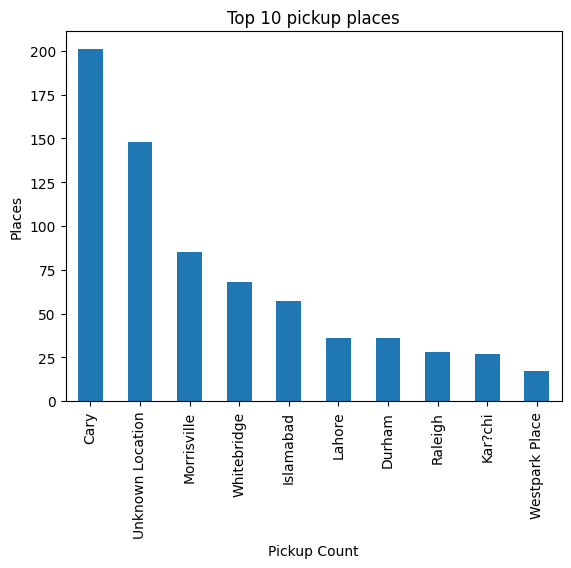

In [ ]:
top_10_places.plot(kind='bar', ylabel='Places', xlabel='Pickup Count', title='Top 10 pickup places')

# Conlcusion- CARY is the most popular stop place for this user.

In [ ]:
# Getting start loaction where it is unknown

df[df['START']== 'Unknown Location']['START'].value_counts()

,count
START,
Unknown Location,148


In [ ]:
# Getting stop loaction where it is unknown

df[df['STOP']== 'Unknown Location']['STOP'].value_counts()

,count
STOP,
Unknown Location,149


In [ ]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
START_DATE,421,2016-07-01 12:31:09.976247040,2016-01-01 21:11:00,2016-04-01 13:43:00,2016-07-04 18:23:00,2016-10-10 17:22:00,2016-12-12 20:48:00,NaN
END_DATE,420,2016-07-01 12:11:10.142857216,2016-01-01 21:17:00,2016-03-27 15:10:00,2016-07-04 18:19:00,2016-10-10 17:39:15,2016-12-12 20:57:00,NaN
MILES,1154.0,10.567418,0.5,2.9,6.0,10.4,310.3,21.588452
time,421.0,14.988124,0.0,12.0,15.0,18.0,23.0,4.668777


In [ ]:
# Getting total miles covered in the dataset according to the START & STOP Location

df.groupby(['START','STOP'])['MILES'].sum().sort_values(ascending=False)[1:11]

START             STOP            
Morrisville       Cary                395.7
Cary              Durham              390.0
                  Morrisville         380.0
Raleigh           Cary                365.7
Cary              Raleigh             336.5
Durham            Cary                324.5
Latta             Jacksonville        310.3
Islamabad         Unknown Location    267.0
Cary              Cary                255.9
Unknown Location  Islamabad           243.8
Name: MILES, dtype: float64

<Axes: xlabel='ROUND_TRIP', ylabel='count'>

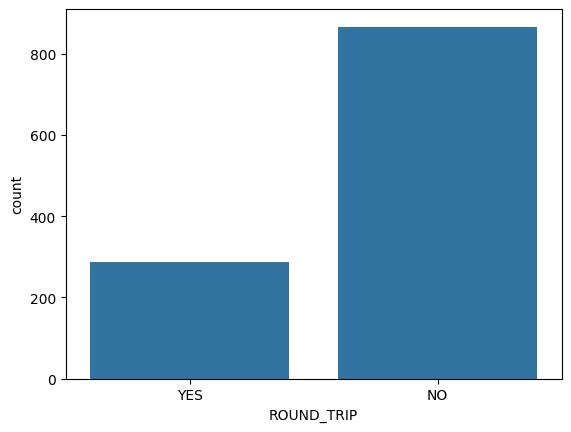

In [ ]:
# Checking for round trips

def is_roundtrip(df):
  if df['START'] == df['STOP']:
    return 'YES'
  else:
    return 'NO'

df['ROUND_TRIP'] = df.apply(is_roundtrip, axis=1)

sns.countplot(x='ROUND_TRIP', data=df)

In [ ]:
# Getting how many rides are round trips


df['ROUND_TRIP'].value_counts()

,count
ROUND_TRIP,
NO,866
YES,288
